In [24]:
import os
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np


print(tf.__version__)

2.2.0


## Load VGG16 Model

In [25]:
'''
VGG16 parameters 
- include_top = Boolean, whether to include the 3-FC layers at the top of the network
- weights = path to wieghts file, 'imagenet'(pre-training on ImageNet), None
- input_tensor = optinal Keras tensor to use as image input for the model
- input_shape = It should have 3 input channels 
- pooling = Optional pooling mode for feature extraction when include_top is False.
- classes = optional number of classes to classify images into, 
        only to be specified if include_top is True, 
        and if no weights argument is specified.
- classifier_activation = str or callable, Ignored unless include_top=True. ex) softmax

VGG16 returns keras.Model instance
'''
base_model = VGG16(weights='imagenet')

In [60]:
layer_dict = dict([(layer.name, layer) for layer in base_model.layers])
testModel = layer_dict['block5_pool'].output

In [26]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('flatten').output)

### VGG16 Model

13 Convolution Layer, 3 FC Layer  
We get Neural Network Weights before FC Layer  

In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [51]:
testModel.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [28]:
class_names = os.listdir("../feature/feature_fbank/")
class_names.sort()
   
forPrintList = [class_name.split('_')[1] for class_name in class_names]
print(forPrintList)

['kwakjuheon', 'kimjiho', 'songyejin', 'parksohui', 'moonyeonwoo', 'kangsubin', 'leekyeongeun', 'chochaeyeon', 'shindonghwan', 'kwakmirae', 'kimhyeryeong', 'chaeminjoon', 'kwakyiheon', 'leesumin', 'choihayoung', 'kangyeseo', 'kwakmihyang', 'eundano', 'limjinju', 'kwonyuna', 'kwoneunkyung', 'johaesu', 'leebyeongjin', 'hyeonsanghyeok', 'jennie', 'simseungmin', 'parksomi', 'yuminji', 'parksojin', 'kwonyeonwoo', 'ladakyeong', 'janghyomin', 'parkeunbi', 'parkdayeung', 'parkjongae', 'hansohee', 'janggyeoul', 'leewooju', 'nomyungok', 'heoyoonjung', 'heojaemin', 'kimsoyung', 'chuminha', 'kimhyeonsu', 'chaesonghwa', 'kwonyulim', 'kimminyoung', 'jueunhong', 'leejeongju', 'kimsubin', 'kimkihyeon', 'kimminji', 'myeongjaewon', 'kimjihyeon']


In [29]:
x_list = []
y_list = []
fname_list =[]
for i in range(0,len(class_names)):
    files=os.listdir("../feature/feature_fbank/"+class_names[i])
    files = [file for file in files if file.endswith(".npy")]
    print(class_names[i].split('_')[0])

    for j in range(0, len(files)):
        print(files[j], j)
        x = np.load("../feature/feature_fbank/"+class_names[i]+"/"+files[j])
        fname_list.append("../feature/feature_fbank/"+class_names[i]+"/"+files[j])
        x_list.append(x)
        y_list.append(i)
print(type(x))
print(y_list)
# print(x_list)

2017019740001
2017019740001_kwakjuheon_4.npy 0
2017019740001_kwakjuheon_1.npy 1
2017019740001_kwakjuheon_0.npy 2
2017019740001_kwakjuheon_2.npy 3
2017019740001_kwakjuheon_3.npy 4
2017019740002
2017019740002_kimjiho_3.npy 0
2017019740002_kimjiho_1.npy 1
2017019740002_kimjiho_2.npy 2
2017019740002_kimjiho_4.npy 3
2017019740002_kimjiho_0.npy 4
2017019740003
2017019740003_songyejin_2.npy 0
2017019740003_songyejin_3.npy 1
2017019740003_songyejin_4.npy 2
2017019740003_songyejin_1.npy 3
2017019740003_songyejin_0.npy 4
2017019740004
2017019740004_parksohui_2.npy 0
2017019740004_parksohui_1.npy 1
2017019740004_parksohui_3.npy 2
2017019740004_parksohui_0.npy 3
2017019740004_parksohui_4.npy 4
2017019740005
2017019740005_moonyeonwoo_3.npy 0
2017019740005_moonyeonwoo_2.npy 1
2017019740005_moonyeonwoo_0.npy 2
2017019740005_moonyeonwoo_4.npy 3
2017019740005_moonyeonwoo_1.npy 4
2017019740006
2017019740006_kangsubin_3.npy 0
2017019740006_kangsubin_1.npy 1
2017019740006_kangsubin_4.npy 2
2017019740006_k

### Convert Feature Numpy Array to PNG image

In [30]:
import imageio
import os
def npy_2_png (cname,fname):
    if not os.path.exists("../feature/feature_fbank_png/"):
        os.makedirs("../feature/feature_fbank_png/")
    if not os.path.exists("../feature/feature_fbank_png/"+cname) :
        os.makedirs("../feature/feature_fbank_png/"+cname)
    
    array = np.load("../feature/feature_fbank/"+cname+"/"+fname)
    
    array = array - np.min(array)
    array = array / np.max(array)
    array = array * 255.0
    
    i = fname.split('_')[2].split('.')[0]
    if os.path.exists("../feature/feature_fbank_png/"+cname+"/{}.png".format(i)):
        os.remove("../feature/feature_fbank_png/"+cname+"/{}.png".format(i))
        
    imageio.imwrite("../feature/feature_fbank_png/"+cname+"/{}.png".format(i),array)
    return "../feature/feature_fbank_png/"+cname+"/{}.png".format(i)

In [31]:
X_TF = []
y_TF = []
for i,fname in zip(range(0,len(fname_list)), fname_list):
    print(i,fname)
    
    fbank = image.load_img(npy_2_png(fname.split('/')[3],fname.split('/')[4]), target_size=(224,224))
    tempX = image.img_to_array(fbank)
    tempX = np.expand_dims(tempX, axis=0)
    tempX = preprocess_input(tempX)
    
    flatten = model.predict(tempX)
    
    X_TF.append(list(flatten[0]))
    y_TF.append(class_names.index(fname.split('/')[3]))

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


0 ../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_4.npy
1 ../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


2 ../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_0.npy
3 ../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_2.npy
4 ../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


5 ../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_3.npy
6 ../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_1.npy
7 ../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


8 ../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_4.npy
9 ../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_0.npy
10 ../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


11 ../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_3.npy
12 ../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_4.npy
13 ../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


14 ../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_0.npy
15 ../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_2.npy
16 ../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


17 ../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_3.npy
18 ../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_0.npy
19 ../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


20 ../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_3.npy
21 ../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_2.npy
22 ../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


23 ../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_4.npy
24 ../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_1.npy
25 ../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


26 ../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_1.npy
27 ../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_4.npy
28 ../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


29 ../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_0.npy
30 ../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_2.npy
31 ../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


32 ../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_0.npy
33 ../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_3.npy
34 ../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


35 ../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_4.npy
36 ../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_3.npy
37 ../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


38 ../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_1.npy
39 ../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_0.npy
40 ../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


41 ../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_2.npy
42 ../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_4.npy
43 ../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


44 ../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_3.npy
45 ../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_4.npy
46 ../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


47 ../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_1.npy
48 ../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_2.npy
49 ../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


50 ../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_1.npy
51 ../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_3.npy
52 ../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


53 ../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_4.npy
54 ../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_2.npy
55 ../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


56 ../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_4.npy
57 ../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_1.npy
58 ../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


59 ../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_3.npy
60 ../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_0.npy
61 ../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


62 ../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_4.npy
63 ../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_2.npy
64 ../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


65 ../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_0.npy
66 ../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_4.npy
67 ../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


68 ../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_1.npy
69 ../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_3.npy
70 ../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


71 ../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_1.npy
72 ../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_4.npy
73 ../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


74 ../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_0.npy
75 ../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_0.npy
76 ../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


77 ../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_2.npy
78 ../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_4.npy
79 ../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


80 ../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_3.npy
81 ../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_2.npy
82 ../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


83 ../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_4.npy
84 ../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_0.npy
85 ../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


86 ../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_4.npy
87 ../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_1.npy
88 ../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


89 ../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_2.npy
90 ../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_1.npy
91 ../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


92 ../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_4.npy
93 ../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_2.npy
94 ../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


95 ../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_1.npy
96 ../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_0.npy
97 ../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


98 ../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_2.npy
99 ../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_4.npy
100 ../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


101 ../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_2.npy
102 ../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_0.npy
103 ../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


104 ../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_4.npy
105 ../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_4.npy
106 ../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


107 ../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_1.npy
108 ../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_2.npy
109 ../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


110 ../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_4.npy
111 ../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_3.npy
112 ../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


113 ../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_2.npy
114 ../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_1.npy
115 ../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


116 ../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_2.npy
117 ../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_4.npy
118 ../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


119 ../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_3.npy
120 ../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_4.npy
121 ../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


122 ../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_1.npy
123 ../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_2.npy
124 ../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


125 ../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_3.npy
126 ../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_2.npy
127 ../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


128 ../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_4.npy
129 ../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_0.npy
130 ../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


131 ../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_1.npy
132 ../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_3.npy
133 ../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


134 ../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_4.npy
135 ../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_3.npy
136 ../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


137 ../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_0.npy
138 ../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_1.npy
139 ../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


140 ../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_1.npy
141 ../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_4.npy
142 ../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


143 ../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_3.npy
144 ../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_2.npy
145 ../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


146 ../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_2.npy
147 ../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_3.npy
148 ../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


149 ../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_1.npy
150 ../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_1.npy
151 ../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


152 ../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_3.npy
153 ../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_0.npy
154 ../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


155 ../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_2.npy
156 ../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_3.npy
157 ../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


158 ../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_1.npy
159 ../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_4.npy
160 ../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


161 ../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_2.npy
162 ../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_0.npy
163 ../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


164 ../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_4.npy
165 ../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_4.npy
166 ../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


167 ../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_3.npy
168 ../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_1.npy
169 ../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


170 ../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_4.npy
171 ../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_2.npy
172 ../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


173 ../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_0.npy
174 ../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_1.npy
175 ../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


176 ../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_1.npy
177 ../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_0.npy
178 ../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


179 ../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_4.npy
180 ../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_4.npy
181 ../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


182 ../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_2.npy
183 ../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_1.npy
184 ../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


185 ../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_3.npy
186 ../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_4.npy
187 ../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


188 ../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_2.npy
189 ../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_0.npy
190 ../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


191 ../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_1.npy
192 ../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_0.npy
193 ../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


194 ../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_3.npy
195 ../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_4.npy
196 ../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


197 ../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_3.npy
198 ../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


199 ../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_0.npy
200 ../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_4.npy
201 ../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


202 ../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_2.npy
203 ../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_0.npy
204 ../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


205 ../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_4.npy
206 ../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_0.npy
207 ../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


208 ../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_2.npy
209 ../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_3.npy
210 ../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


211 ../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_4.npy
212 ../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_2.npy
213 ../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


214 ../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_1.npy
215 ../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_1.npy
216 ../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


217 ../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_4.npy
218 ../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_0.npy
219 ../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


220 ../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_2.npy
221 ../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_0.npy
222 ../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


223 ../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_4.npy
224 ../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_3.npy
225 ../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


226 ../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_3.npy
227 ../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_4.npy
228 ../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


229 ../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_0.npy
230 ../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_3.npy
231 ../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


232 ../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_4.npy
233 ../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_0.npy
234 ../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


235 ../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_4.npy
236 ../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_0.npy
237 ../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


238 ../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_1.npy
239 ../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_2.npy
240 ../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


241 ../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_0.npy
242 ../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_2.npy
243 ../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


244 ../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_3.npy
245 ../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_1.npy
246 ../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


247 ../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_3.npy
248 ../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_0.npy
249 ../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


250 ../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_0.npy
251 ../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_3.npy
252 ../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


253 ../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_2.npy
254 ../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_1.npy
255 ../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


256 ../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_4.npy
257 ../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_2.npy
258 ../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


259 ../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_3.npy
260 ../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_2.npy
261 ../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


262 ../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_0.npy
263 ../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_4.npy
264 ../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


265 ../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_1.npy
266 ../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_0.npy
267 ../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


268 ../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_3.npy
269 ../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_2.npy


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

X_TF_train = np.array(X_TF)
y_TF_train = np.array(y_TF)

X_TF_train, X_TF_test, y_TF_train, y_TF_test = train_test_split(X_TF_train, y_TF_train, test_size=0.30, random_state=42, stratify=y_TF_train)

from tensorflow.keras.utils import to_categorical
y_TF_train_encoded = tf.keras.utils.to_categorical(y_TF_train)
y_TF_test_encoded = tf.keras.utils.to_categorical(y_TF_test)

X_TF_train_reshape = X_TF_train.reshape(-1, X_TF_train.shape[1], 1)
X_TF_test_reshape   = X_TF_test.reshape(-1, X_TF_test.shape[1], 1)

In [33]:
print(X_TF_train_reshape.shape)
print(X_TF_test_reshape.shape)

print(y_TF_train_encoded.shape)
print(y_TF_test_encoded.shape)

(189, 25088, 1)
(81, 25088, 1)
(189, 54)
(81, 54)


## Classifier Learninig 

#### Fully Connected Layer

In [46]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Dropout, LSTM, Embedding

model2 = tf.keras.Sequential()
model2.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu',
                         input_shape=(X_TF_train_reshape.shape[1], 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(256, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(y_TF_train_encoded.shape[1], activation="softmax"))

In [47]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 25088, 64)         256       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6272, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 401408)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               102760704 
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 54)                13878     
Total params: 102,774,838
Trainable params: 102,774,838
Non-trainable params: 0
________________________________________

In [48]:
model2.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [49]:
history = model2.fit(X_TF_train_reshape, y_TF_train_encoded, epochs=20, verbose=1,batch_size=4, validation_data=(X_TF_test_reshape, y_TF_test_encoded))

Epoch 1/20
48/48 [==============================] - 10s 210ms/step - loss: 18.9508 - accuracy: 0.0000e+00 - val_loss: 3.9893 - val_accuracy: 0.0123
Epoch 2/20
48/48 [==============================] - 10s 214ms/step - loss: 3.9900 - accuracy: 0.0106 - val_loss: 3.9898 - val_accuracy: 0.0123
Epoch 3/20
48/48 [==============================] - 10s 214ms/step - loss: 3.9899 - accuracy: 0.0159 - val_loss: 3.9903 - val_accuracy: 0.0123
Epoch 4/20
48/48 [==============================] - 10s 209ms/step - loss: 3.9893 - accuracy: 0.0106 - val_loss: 3.9906 - val_accuracy: 0.0123
Epoch 5/20
48/48 [==============================] - 10s 207ms/step - loss: 3.9896 - accuracy: 0.0000e+00 - val_loss: 3.9911 - val_accuracy: 0.0123
Epoch 6/20
48/48 [==============================] - 10s 208ms/step - loss: 3.9892 - accuracy: 0.0212 - val_loss: 3.9915 - val_accuracy: 0.0123
Epoch 7/20
48/48 [==============================] - 10s 214ms/step - loss: 3.9891 - accuracy: 0.0212 - val_loss: 3.9919 - val_accurac

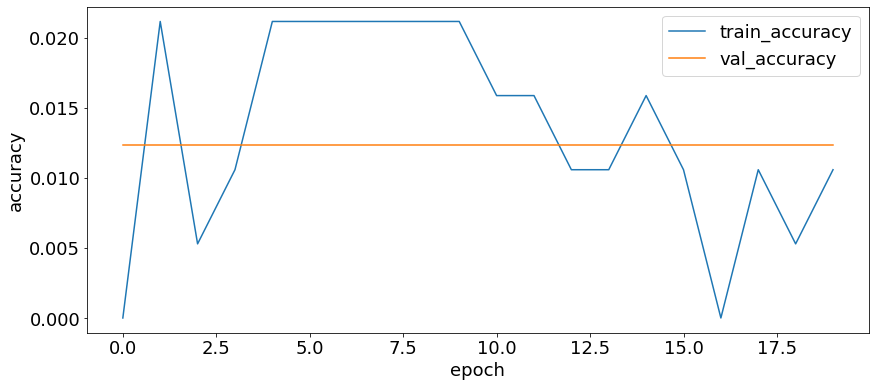

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()

In [65]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

vgg_model = VGG16(weights='imagenet',
                               include_top=False,
                               input_shape=(224, 224, 3))
vgg_model.summary()
layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])
testModel = layer_dict['block5_pool'].output
testModel = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(testModel)
testModel = MaxPooling2D(pool_size=(2,2))(testModel)
testModel = Flatten()(testModel)
testModel = Dense(256, activation='relu')(testModel)
testModel = Dropout(0.5)(testModel)
testModel =Dense(len(class_names), activation='softmax')(testModel)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [76]:
from tensorflow.keras.models import Model
custom_model = Model(vgg_model.input, testModel)

for layer in custom_model.layers[:7]:
    layer.trainable = False
    
custom_model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [99]:
X_vgg16 = np.empty(0)
y_vgg16 = []
for i,fname in zip(range(0,len(fname_list)), fname_list):
    print(i,fname)
    
    fbank = image.load_img(npy_2_png(fname.split('/')[3],fname.split('/')[4]), target_size=(224,224))
    tempX = image.img_to_array(fbank)
    tempX = np.expand_dims(tempX, axis=0)
    tempX = preprocess_input(tempX)
    print(tempX.shape)
    if len(X_vgg16)==0 : 
        X_vgg16 =tempX
    else : X_vgg16 = np.concatenate((X_vgg16, tempX), axis=0)
    y_vgg16.append(class_names.index(fname.split('/')[3]))

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


0 ../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_4.npy
(1, 224, 224, 3)
1 ../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_1.npy
(1, 224, 224, 3)
2 ../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_0.npy
(1, 224, 224, 3)
3 ../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_2.npy
(1, 224, 224, 3)
4 ../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_3.npy
(1, 224, 224, 3)
5 ../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_3.npy
(1, 224, 224, 3)
6 ../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_1.npy
(1, 224, 224, 3)
7 ../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_2.npy
(1, 224, 224, 3)
8 ../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_4.npy
(1, 224, 224, 3)
9 ../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_0.npy
(1, 224, 224, 3)
10 ../feature/feature_fbank/20

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


(1, 224, 224, 3)
40 ../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_1.npy
(1, 224, 224, 3)
41 ../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_2.npy
(1, 224, 224, 3)
42 ../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_4.npy
(1, 224, 224, 3)
43 ../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_0.npy
(1, 224, 224, 3)
44 ../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_3.npy
(1, 224, 224, 3)
45 ../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_4.npy
(1, 224, 224, 3)
46 ../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_0.npy
(1, 224, 224, 3)
47 ../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_1.npy
(1, 224, 224, 3)
48 ../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_2.npy
(1, 224, 224, 3)
49 ../feature/feature_fbank/2017019740010_kwakmirae/2017019740

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


(1, 224, 224, 3)
68 ../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_1.npy
(1, 224, 224, 3)
69 ../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_3.npy
(1, 224, 224, 3)
70 ../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_3.npy
(1, 224, 224, 3)
71 ../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_1.npy
(1, 224, 224, 3)
72 ../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_4.npy
(1, 224, 224, 3)
73 ../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_2.npy
(1, 224, 224, 3)
74 ../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_0.npy
(1, 224, 224, 3)
75 ../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_0.npy
(1, 224, 224, 3)
76 ../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_3.npy
(1, 224, 224, 3)
77 ../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


(1, 224, 224, 3)
88 ../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_3.npy
(1, 224, 224, 3)
89 ../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_2.npy
(1, 224, 224, 3)
90 ../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_1.npy
(1, 224, 224, 3)
91 ../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_3.npy
(1, 224, 224, 3)
92 ../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_4.npy
(1, 224, 224, 3)
93 ../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_2.npy
(1, 224, 224, 3)
94 ../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_0.npy
(1, 224, 224, 3)
95 ../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_1.npy
(1, 224, 224, 3)
96 ../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_0.npy
(1, 224, 224, 3)
97 ../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_3.npy
(1, 224, 224, 3)
98 ../feature/fea

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


105 ../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_4.npy
(1, 224, 224, 3)
106 ../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_0.npy
(1, 224, 224, 3)
107 ../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_1.npy
(1, 224, 224, 3)
108 ../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_2.npy
(1, 224, 224, 3)
109 ../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_3.npy
(1, 224, 224, 3)
110 ../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_4.npy
(1, 224, 224, 3)
111 ../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_3.npy
(1, 224, 224, 3)
112 ../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_0.npy
(1, 224, 224, 3)
113 ../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_2.npy
(1, 224, 224, 3)
114 ../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_1.npy
(1, 224

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


121 ../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_0.npy
(1, 224, 224, 3)
122 ../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_1.npy
(1, 224, 224, 3)
123 ../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_2.npy
(1, 224, 224, 3)
124 ../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_3.npy
(1, 224, 224, 3)
125 ../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_3.npy
(1, 224, 224, 3)
126 ../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_2.npy
(1, 224, 224, 3)
127 ../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_1.npy
(1, 224, 224, 3)
128 ../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_4.npy
(1, 224, 224, 3)
129 ../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_0.npy
(1, 224, 224, 3)
130 ../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_2.npy
(1, 224, 224, 3)
131 ..

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


(1, 224, 224, 3)
136 ../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_4.npy
(1, 224, 224, 3)
137 ../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_0.npy
(1, 224, 224, 3)
138 ../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_1.npy
(1, 224, 224, 3)
139 ../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_2.npy
(1, 224, 224, 3)
140 ../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_1.npy
(1, 224, 224, 3)
141 ../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_4.npy
(1, 224, 224, 3)
142 ../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_0.npy
(1, 224, 224, 3)
143 ../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_3.npy
(1, 224, 224, 3)
144 ../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_2.npy
(1, 224, 224, 3)
145 ../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_0.npy
(1, 224, 224

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


149 ../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_1.npy
(1, 224, 224, 3)
150 ../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_1.npy
(1, 224, 224, 3)
151 ../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_4.npy
(1, 224, 224, 3)
152 ../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_3.npy
(1, 224, 224, 3)
153 ../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_0.npy
(1, 224, 224, 3)
154 ../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_2.npy
(1, 224, 224, 3)
155 ../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_2.npy
(1, 224, 224, 3)
156 ../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_3.npy
(1, 224, 224, 3)
157 ../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_0.npy
(1, 224, 224, 3)
158 ../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_1

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


162 ../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_0.npy
(1, 224, 224, 3)
163 ../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_1.npy
(1, 224, 224, 3)
164 ../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_4.npy
(1, 224, 224, 3)
165 ../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_4.npy
(1, 224, 224, 3)
166 ../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_2.npy
(1, 224, 224, 3)
167 ../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_3.npy
(1, 224, 224, 3)
168 ../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_1.npy
(1, 224, 224, 3)
169 ../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_0.npy
(1, 224, 224, 3)
170 ../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_4.npy
(1, 224, 224, 3)
171 ../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


(1, 224, 224, 3)
174 ../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_1.npy
(1, 224, 224, 3)
175 ../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_3.npy
(1, 224, 224, 3)
176 ../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_1.npy
(1, 224, 224, 3)
177 ../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_0.npy
(1, 224, 224, 3)
178 ../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_2.npy
(1, 224, 224, 3)
179 ../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_4.npy
(1, 224, 224, 3)
180 ../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_4.npy
(1, 224, 224, 3)
181 ../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_3.npy
(1, 224, 224, 3)
182 ../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_2.npy
(1, 224, 224, 3)
183 ../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


185 ../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_3.npy
(1, 224, 224, 3)
186 ../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_4.npy
(1, 224, 224, 3)
187 ../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_1.npy
(1, 224, 224, 3)
188 ../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_2.npy
(1, 224, 224, 3)
189 ../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_0.npy
(1, 224, 224, 3)
190 ../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_4.npy
(1, 224, 224, 3)
191 ../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_1.npy
(1, 224, 224, 3)
192 ../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_0.npy
(1, 224, 224, 3)
193 ../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_2.npy
(1, 224, 224, 3)
194 ../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_3.npy
(1, 224, 224, 3)
195 ../fea

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


196 ../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_2.npy
(1, 224, 224, 3)
197 ../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_3.npy
(1, 224, 224, 3)
198 ../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_1.npy
(1, 224, 224, 3)
199 ../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_0.npy
(1, 224, 224, 3)
200 ../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_4.npy
(1, 224, 224, 3)
201 ../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_1.npy
(1, 224, 224, 3)
202 ../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_2.npy
(1, 224, 224, 3)
203 ../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_0.npy
(1, 224, 224, 3)
204 ../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_3.npy
(1, 224, 224, 3)
205 ../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_4.npy
(

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


(1, 224, 224, 3)
207 ../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_1.npy
(1, 224, 224, 3)
208 ../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_2.npy
(1, 224, 224, 3)
209 ../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_3.npy
(1, 224, 224, 3)
210 ../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_0.npy
(1, 224, 224, 3)
211 ../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_4.npy
(1, 224, 224, 3)
212 ../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_2.npy
(1, 224, 224, 3)
213 ../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_3.npy
(1, 224, 224, 3)
214 ../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_1.npy
(1, 224, 224, 3)
215 ../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_1.npy
(1, 224, 224, 3)


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


216 ../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_2.npy
(1, 224, 224, 3)
217 ../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_4.npy
(1, 224, 224, 3)
218 ../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_0.npy
(1, 224, 224, 3)
219 ../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_3.npy
(1, 224, 224, 3)
220 ../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_2.npy
(1, 224, 224, 3)
221 ../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_0.npy
(1, 224, 224, 3)
222 ../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_1.npy
(1, 224, 224, 3)
223 ../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_4.npy
(1, 224, 224, 3)
224 ../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_3.npy
(1, 224, 224, 3)
225 ../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwony

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


226 ../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_3.npy
(1, 224, 224, 3)
227 ../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_4.npy
(1, 224, 224, 3)
228 ../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_1.npy
(1, 224, 224, 3)
229 ../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_0.npy
(1, 224, 224, 3)
230 ../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_3.npy
(1, 224, 224, 3)
231 ../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_2.npy
(1, 224, 224, 3)
232 ../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_4.npy
(1, 224, 224, 3)
233 ../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_0.npy
(1, 224, 224, 3)
234 ../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_1.npy
(1, 224, 224, 3)


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


235 ../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_4.npy
(1, 224, 224, 3)
236 ../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_0.npy
(1, 224, 224, 3)
237 ../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_3.npy
(1, 224, 224, 3)
238 ../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_1.npy
(1, 224, 224, 3)
239 ../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_2.npy
(1, 224, 224, 3)
240 ../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_1.npy
(1, 224, 224, 3)
241 ../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_0.npy
(1, 224, 224, 3)
242 ../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_2.npy
(1, 224, 224, 3)
243 ../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_4.npy
(1, 224, 224, 3)


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


244 ../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_3.npy
(1, 224, 224, 3)
245 ../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_1.npy
(1, 224, 224, 3)
246 ../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_4.npy
(1, 224, 224, 3)
247 ../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_3.npy
(1, 224, 224, 3)
248 ../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_0.npy
(1, 224, 224, 3)
249 ../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_2.npy
(1, 224, 224, 3)
250 ../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_0.npy
(1, 224, 224, 3)
251 ../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_3.npy
(1, 224, 224, 3)
252 ../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_4.npy
(1, 224, 224, 3)


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


253 ../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_2.npy
(1, 224, 224, 3)
254 ../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_1.npy
(1, 224, 224, 3)
255 ../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_1.npy
(1, 224, 224, 3)
256 ../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_4.npy
(1, 224, 224, 3)
257 ../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_2.npy
(1, 224, 224, 3)
258 ../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_0.npy
(1, 224, 224, 3)
259 ../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_3.npy
(1, 224, 224, 3)
260 ../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_2.npy
(1, 224, 224, 3)
261 ../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_1.npy
(1, 224, 224, 3)


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


262 ../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_0.npy
(1, 224, 224, 3)
263 ../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_4.npy
(1, 224, 224, 3)
264 ../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_3.npy
(1, 224, 224, 3)
265 ../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_1.npy
(1, 224, 224, 3)
266 ../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_0.npy
(1, 224, 224, 3)
267 ../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_4.npy
(1, 224, 224, 3)
268 ../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_3.npy
(1, 224, 224, 3)
269 ../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_2.npy
(1, 224, 224, 3)


In [100]:
X_vgg16_train = np.array(X_vgg16)
print(X_vgg16_train.shape)

(270, 224, 224, 3)


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

X_vgg16_train = np.array(X_vgg16)
y_vgg16_train = np.array(y_vgg16)

X_vgg16_train, X_vgg16_test, y_vgg16_train, y_vgg16_test = train_test_split(X_vgg16_train, y_vgg16_train, test_size=0.30, random_state=42, stratify=y_vgg16_train)

from tensorflow.keras.utils import to_categorical
y_vgg16_train_encoded = tf.keras.utils.to_categorical(y_vgg16_train)
y_vgg16_test_encoded = tf.keras.utils.to_categorical(y_vgg16_test)

# X_vgg16_train_reshape = X_vgg16_train.reshape(-1, X_vgg16_train.shape[1],X_vgg16_train.shape[2], 1)
# X_vgg16_test_reshape   = X_vgg16_test.reshape(-1, X_vgg16_test.shape[1],X_vgg16_test.shape[2], 1)

In [106]:
print(X_vgg16_train.shape)
print(X_vgg16_test.shape)

print(y_vgg16_train_encoded.shape)
print(y_vgg16_test_encoded.shape)

(189, 224, 224, 3)
(81, 224, 224, 3)
(189, 54)
(81, 54)


In [108]:
custom_model.compile(loss='categorical_crossentropy',
                     optimizer='rmsprop',
                     metrics=['accuracy'])
history = custom_model.fit(X_vgg16_train, y_vgg16_train_encoded, epochs=20, verbose=1,batch_size=4, validation_data=(X_vgg16_test, y_vgg16_test_encoded))

Epoch 1/20
48/48 [==============================] - 36s 753ms/step - loss: 716.3727 - accuracy: 0.0159 - val_loss: 3.9899 - val_accuracy: 0.0123
Epoch 2/20
48/48 [==============================] - 36s 751ms/step - loss: 3.9915 - accuracy: 0.0159 - val_loss: 3.9909 - val_accuracy: 0.0123
Epoch 3/20
48/48 [==============================] - 36s 744ms/step - loss: 3.9908 - accuracy: 0.0159 - val_loss: 3.9921 - val_accuracy: 0.0123
Epoch 4/20
48/48 [==============================] - 36s 747ms/step - loss: 3.9899 - accuracy: 0.0000e+00 - val_loss: 3.9934 - val_accuracy: 0.0123
Epoch 5/20
48/48 [==============================] - 36s 752ms/step - loss: 3.9904 - accuracy: 0.0053 - val_loss: 3.9943 - val_accuracy: 0.0123
Epoch 6/20
48/48 [==============================] - 37s 762ms/step - loss: 3.9897 - accuracy: 0.0106 - val_loss: 3.9956 - val_accuracy: 0.0123
Epoch 7/20
48/48 [==============================] - 36s 759ms/step - loss: 3.9890 - accuracy: 0.0159 - val_loss: 3.9968 - val_accuracy: 

In [39]:
def val_npy_2_png (cname,fname):
    if not os.path.exists("../feature/feature_fbank_validation_png/"):
        os.makedirs("../feature/feature_fbank_validation_png/")
    if not os.path.exists("../feature/feature_fbank_validation_png/"+cname) :
        os.makedirs("../feature/feature_fbank_validation_png/"+cname)
    
    array = np.load("../feature/feature_fbank_validation/"+cname+"/"+fname)
    array = array - np.min(array)
    array = array / np.max(array)
    array = array * 255.0
    
    i = fname.split('_')[2].split('.')[0]
    if os.path.exists("../feature/feature_fbank_validation_png/"+cname+"/{}.png".format(i)):
        os.remove("../feature/feature_fbank_validation_png/"+cname+"/{}.png".format(i))
        
    imageio.imwrite("../feature/feature_fbank_validation_png/"+cname+"/{}.png".format(i),array)
    return "../feature/feature_fbank_validation_png/"+cname+"/{}.png".format(i)

#### Linear SVM

In [40]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_TF_train, y_TF_train)

predicted = clf.predict(X_TF_test)
print(X_TF_test.shape)

# get the accuracy
print (accuracy_score(y_TF_test, predicted))

(81, 25088)
0.9753086419753086


In [41]:
from sklearn.metrics import classification_report
target_names = [class_name.split('_')[1] for class_name in class_names]
print(classification_report(y_TF_test, predicted, target_names=target_names))

                precision    recall  f1-score   support

    kwakjuheon       1.00      1.00      1.00         2
       kimjiho       1.00      1.00      1.00         2
     songyejin       1.00      1.00      1.00         2
     parksohui       1.00      1.00      1.00         1
   moonyeonwoo       1.00      1.00      1.00         1
     kangsubin       1.00      1.00      1.00         1
  leekyeongeun       1.00      1.00      1.00         1
   chochaeyeon       1.00      1.00      1.00         2
  shindonghwan       0.50      1.00      0.67         1
     kwakmirae       1.00      1.00      1.00         1
  kimhyeryeong       1.00      1.00      1.00         2
   chaeminjoon       1.00      1.00      1.00         2
    kwakyiheon       1.00      1.00      1.00         1
      leesumin       1.00      1.00      1.00         1
   choihayoung       1.00      1.00      1.00         2
     kangyeseo       1.00      1.00      1.00         1
   kwakmihyang       1.00      1.00      1.00  

In [42]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
y_TF_score = clf.fit(X_TF_train, y_TF_train).decision_function(X_TF_test)

In [43]:
for i in range(0, len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_TF_test_encoded[:, i], y_TF_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_TF_test_encoded.ravel(), y_TF_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-44-0b5af9027095>:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


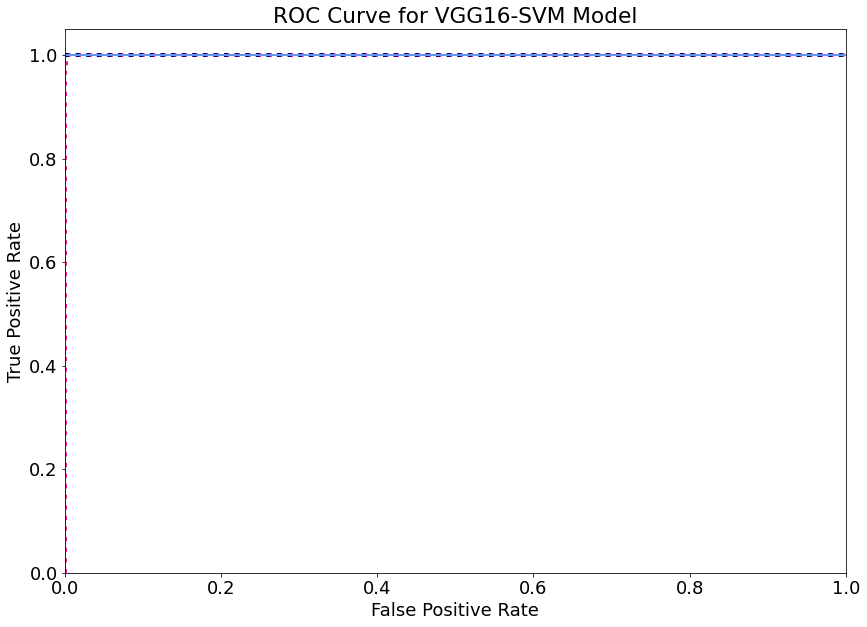

In [44]:
from scipy import interp
from itertools import cycle

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(0, len(class_names))]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(0, len(class_names)):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= len(class_names)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (14,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
lw =2
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for VGG16-SVM Model')
# plt.legend(loc="lower right")
plt.show()

In [45]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_TF_train, y_TF_train)

x_validation_list=[]
y_validation_list=[]

val_class_names = os.listdir("../feature/feature_fbank_validation/")
val_class_names.sort()
val_fname=[]

for i in range(0,len(val_class_names)):
    val_files=os.listdir("../feature/feature_fbank_validation/"+val_class_names[i])
    val_files = [file for file in val_files if file.endswith(".npy")]
    for j in range(0, len(val_files)):
        val_fname.append("../feature/feature_fbank_validation/"+val_class_names[i]+"/"+val_files[j])

X_TF_pred = []
y_TF_pred = []

for i,fname in zip(range(0,len(val_fname)), val_fname):
    print(i,fname)
    
    fbank = image.load_img(val_npy_2_png(fname.split('/')[3],fname.split('/')[4]), target_size=(224,224))
    tempX = image.img_to_array(fbank)
    tempX = np.expand_dims(tempX, axis=0)
    tempX = preprocess_input(tempX)
    
    flatten = model.predict(tempX)
    
    X_TF_pred.append(list(flatten[0]))
    y_TF_pred.append(val_class_names.index(fname.split('/')[3]))

    
X_TF_pred = np.array(X_TF_pred)
y_TF_pred = np.array(y_TF_pred)
y_TF_pred_encode = tf.keras.utils.to_categorical(y_TF_pred)

predicted = clf.predict(X_TF_pred)
real =[]
for i,pred in zip(range(0, len(predicted)), predicted) :
    print("Predict :",class_names[pred], ", Real :", val_class_names[y_TF_pred[i]])
    real.append(class_names.index(val_class_names[y_TF_pred[i]]))
# 
# get the accuracy
print (accuracy_score(real, predicted))

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


0 ../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_4.npy
1 ../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_1.npy
2 ../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


3 ../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_2.npy
4 ../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_3.npy
5 ../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


6 ../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_4.npy
7 ../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_3.npy
8 ../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


9 ../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_2.npy
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019770016_parkjongae , Real : 2017019740001_kwakjuheon
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
0.9


### Global Average Pooling